# Sales Performance Analysis

## Business Context
This analysis explores a retail sales dataset to understand revenue performance,
product contribution, and sales trends over time.

The goal is to demonstrate how Python-based exploratory data analysis (EDA)
can support data-driven business decisions.

## Key Business Questions
- Which products generate the highest revenue?
- How does sales performance vary over time?
- Are unit sales aligned with revenue contribution?



In [3]:
import os
os.getcwd()


'C:\\Users\\dell\\OneDrive\\Desktop\\python-data-analysis-projects\\notebooks'

In [4]:
os.listdir()


['.ipynb_checkpoints',
 '01_sales_data_analysis.ipynb',
 'data_exploration_backup.ipynb',
 'employee_salary_eda.ipynb']

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/raw/beginner_sales_data.csv")
df.head()


,Date,Product,Category,Quantity,Price,Total_Sales
0,1/1/2025,Laptop,Electronics,2,800,1600
1,1/2/2025,Phone,Electronics,5,500,2500
2,1/3/2025,Tablet,Electronics,3,300,900
3,1/4/2025,Laptop,Electronics,1,800,800
4,1/5/2025,Phone,Electronics,4,500,2000


In [7]:
df.shape


(15, 6)

In [14]:
df.columns


Index(['Date', 'Product', 'Category', 'Quantity', 'Price', 'Total_Sales'], dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         15 non-null     object
 1   Product      15 non-null     object
 2   Category     15 non-null     object
 3   Quantity     15 non-null     int64 
 4   Price        15 non-null     int64 
 5   Total_Sales  15 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 852.0+ bytes


The dataset contains daily sales transactions with product type, category, quantity sold, unit price, and total sales value.

In [10]:
df.isna().sum()


Date           0
Product        0
Category       0
Quantity       0
Price          0
Total_Sales    0
dtype: int64

In [16]:
df.duplicated().sum()


np.int64(0)

In [18]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes


Date           datetime64[ns]
Product                object
Category               object
Quantity                int64
Price                   int64
Total_Sales             int64
dtype: object

In [19]:
df.describe()


,Date,Quantity,Price,Total_Sales
count,15,15.000000,15.000000,15.000000
mean,2025-01-08 00:00:00,2.933333,533.333333,1486.666667
min,2025-01-01 00:00:00,1.000000,300.000000,300.000000
25%,2025-01-04 12:00:00,2.000000,300.000000,800.000000
50%,2025-01-08 00:00:00,3.000000,500.000000,1500.000000
75%,2025-01-11 12:00:00,4.000000,800.000000,2200.000000
max,2025-01-15 00:00:00,6.000000,800.000000,3000.000000
std,NaN,1.579632,212.692490,837.399603


## 1️⃣ Total Sales by Product

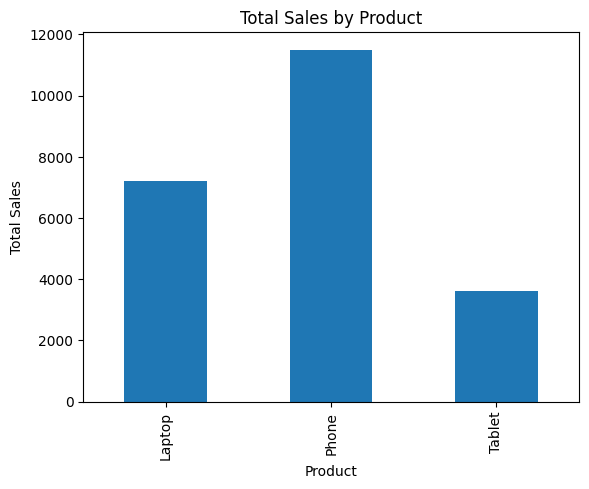

In [23]:
sales_by_product = df.groupby("Product")["Total_Sales"].sum()

sales_by_product.plot(kind="bar", title="Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()


## 🧠 Insight example:

Phones generate the highest total sales, followed by laptops.

## 2️⃣ Daily Sales Trend (Time Series)

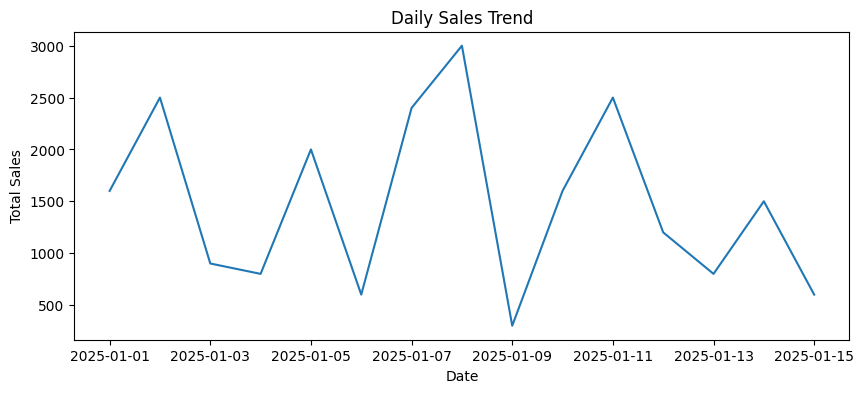

In [21]:
daily_sales = df.groupby("Date")["Total_Sales"].sum()

plt.figure(figsize=(10,4))
plt.plot(daily_sales)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


## 3️⃣ Quantity Sold by Product


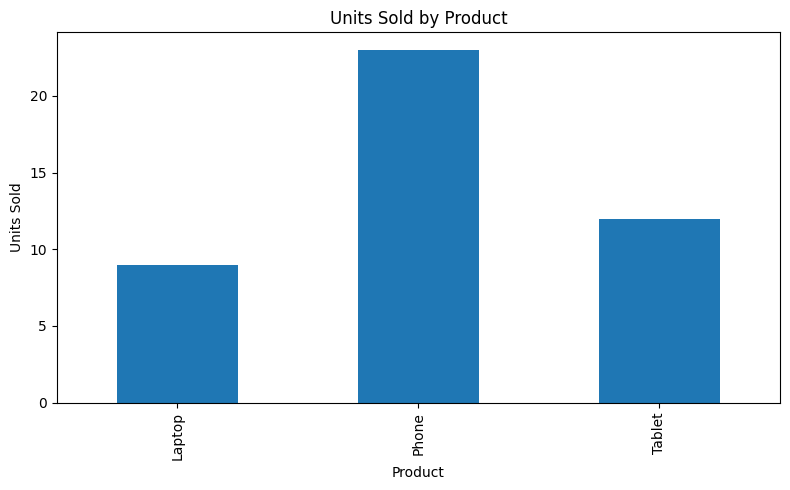

In [32]:
qty_by_product = df.groupby("Product")["Quantity"].sum()

qty_by_product.plot(kind="bar", figsize=(8,5))
plt.title("Units Sold by Product")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()




## Key Insights

- Laptops generated the highest total revenue, indicating strong value per unit.
- Phones sold more units but generated slightly lower total revenue due to pricing.
- Sales show noticeable variation across dates, suggesting opportunities for trend or seasonality analysis.

## Recommendations

- Focus marketing efforts on high-revenue products.
- Analyze promotions or events driving sales spikes.
- Explore customer segmentation for deeper insights.
